# Introduction
My dataset can be found at [here](https://catalog.data.gov/dataset/birth-statistics-a76a6). It is a study recording the low birth weight rates, teen birth rates, birth rates, and preterm rates in Lake County Illinois by zipcode.

**The question that I hope to gain more insight on, given the dataset, is to learn what if there is a correlation!between teen birth rates and low birth weights. This may give insight into how likely it is for a baby to be born healthy during a teen pregancy.**

This interests me because such information may be used when passing laws about abortion, which affects many people and is a prevelant topic.

In [ ]:
#first import necessary R libraries

library(tidyverse) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
#assign birth_stats to the data in the csv
birth_stats <- read_csv("/content/LakeCounty_Health.csv")
#If we want to look at the dataset we can use the variable we assigned it to
birth_stats

Rows: 27 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): OBJECTID, ZIP, LBW, Preterm, TeenBirth, Birth_Rate, F1stTriCare, Sh...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,Shape__Area,Shape__Length
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,60002,0.08483685,0.13412404,18.5,10.440239,74.63970,1149062138,215525.16
2,60010,0.05220809,0.08082751,1.4,3.219561,86.18995,802735363,178637.11
3,60015,0.09551924,0.10195910,1.8,7.635261,83.54413,367457580,111400.89
4,60020,0.07706656,0.08777712,29.9,13.737068,79.07540,166617676,92363.08
5,60030,0.07131088,0.08667450,6.2,10.598146,81.74532,845517891,247258.22
6,60031,0.08140740,0.09899432,10.1,10.265032,78.37213,527117601,163995.18
7,60035,0.06794148,0.08888844,3.6,8.161008,84.82185,345792947,115796.72
8,60040,0.08106019,0.11659696,21.7,14.259259,81.80138,17809434,25907.37
9,60042,0.05721724,0.10399221,5.2,5.142590,74.76279,45177573,45385.40


**Filtering the Data**


This data analysis aims to compare and find if there is any relation between the rate of teen births and the rate of low birth weights. The majority of the columns in the original dataset do not serve the purpose of answering this question, and can thus be filtered out of the dataset for easier analysis.

We can then sort it by order of increasing teen birth rate to see how the low birth weight rate changes.

In [ ]:
#create a new dataset that includes only the columns relevant to this study
teen_birth_stats = subset(birth_stats, select = -c(ZIP,Preterm, Birth_Rate, F1stTriCare, Shape__Area, Shape__Length) )

#display the filtered dataset in order of increasing teen birth rate
teen_birth_stats %>%
  arrange(TeenBirth)

OBJECTID,LBW,TeenBirth
<dbl>,<dbl>,<dbl>
11,0.04882045,0.3
24,0.07683591,0.8
2,0.05220809,1.4
14,0.04703162,1.6
3,0.09551924,1.8
13,0.07136632,3.5
7,0.06794148,3.6
18,0.05770070,4.3
10,0.04574074,4.8


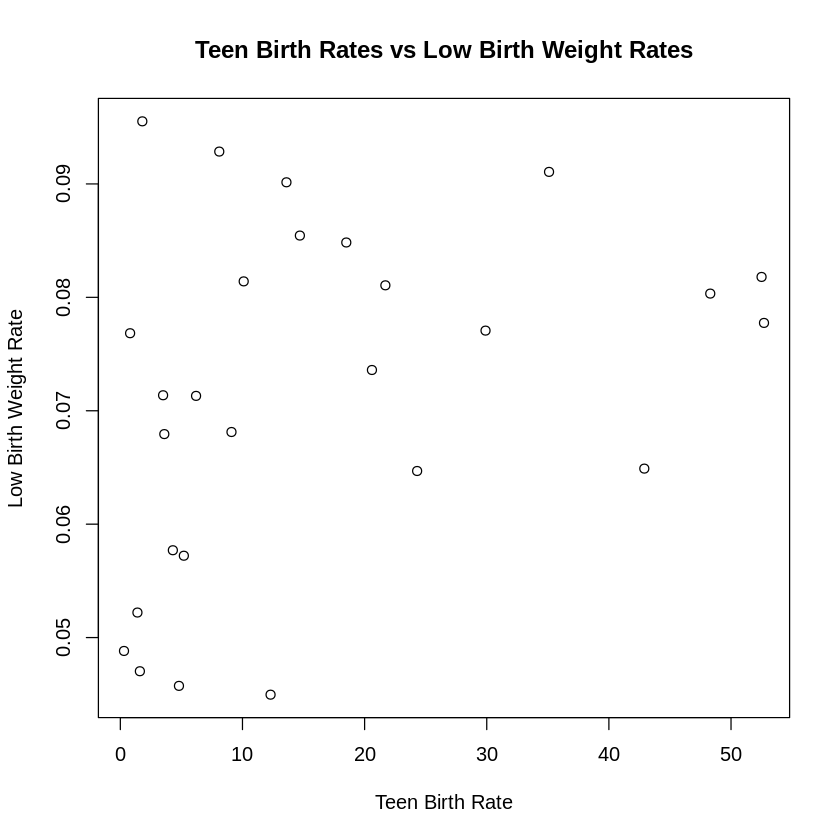

In [ ]:
#there are much more sophisticated plots that can be done, and if one just wants to use visualization to get a sense of what is going on in the data, simple plots can be sufficient.
plot(x= teen_birth_stats$`TeenBirth`, y=birth_stats$LBW, main="Teen Birth Rates vs Low Birth Weight Rates", xlab="Teen Birth Rate", ylab="Low Birth Weight Rate")

After plotting the initial scatter plot and looking at the sorted data table, it is clear that many of the plot points have a teen birth rate less than 10. In fact, 13 of 27 fall within this range. In order to more accurately analyze the graph, a trendline should be inserted into the graph.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


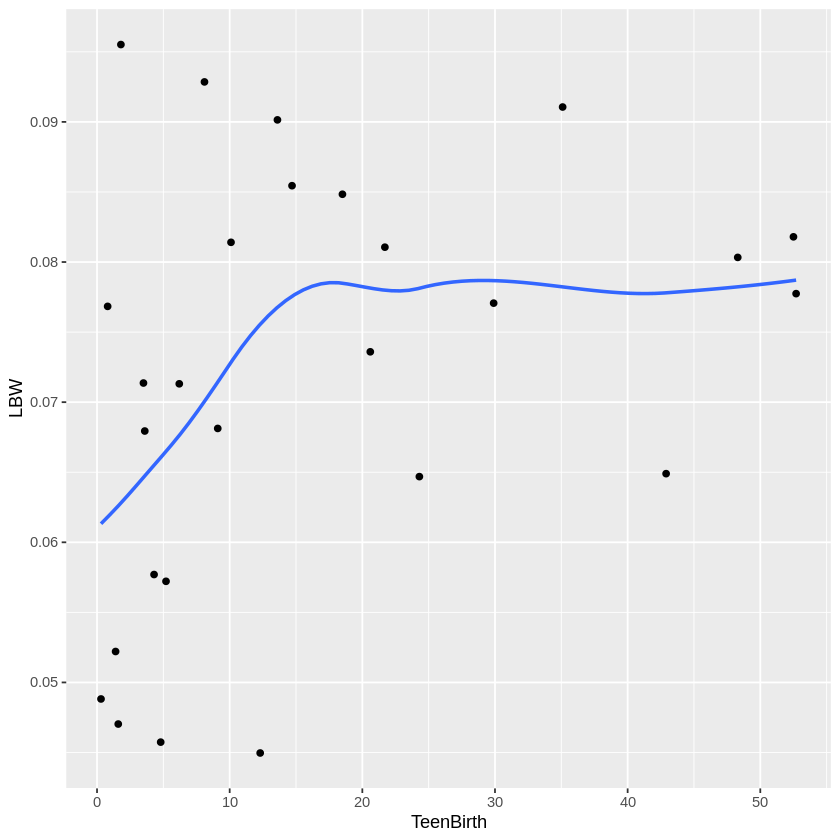

In [ ]:
library(ggplot2)
ggplot(teen_birth_stats, aes(x=TeenBirth, y=LBW))+geom_point()+geom_smooth(se=FALSE)

**Analysis**

Looking at the plotted graph, there does seem to be a correlation between teen birth rates and low birth weight rates in Lake County, Illinois. This correlation appears to be approximately logarithmic, according to the trendline presented.

This suggest that as teen birth rates increase, the rate of low birth weights will also increase logarithmically.

**Data Limitations**

There are various limitations in this dataset that possibly skew the results of the data analysis.

First, the source of this information does not specifiy what age ranges were considered to be within the "teen" age range. While some studies may consider 19 to be the final teen year, others consider adulthood to begin at 18 or even 16. Additionally, the data does not specify the frequencies of birth for each range. Since a teenager of 19 years is significantly more developed than a 13 year old, the probability of a low birth weight of a child born to a 19 year old may be lower than that of a 13 year old. It may be the case that in counties where there are higher teen birth rates, the majority of the births are coming from younger teens, resulting in a higher rate of low birth weights; however, this is not specified by the dataset.

Furthermore, the dataset has a very small scope, both in terms of the population that was used to supply the data and the geographic scope of the study. This dataset only contains information regarding births in Lake County Illinois. Depending on a multitude of factors such as economy and culture in Lake County, the results of this relatively small population may be very different from other locations across the United states.

**Questions for the future**

I think it would be interesting to look more into the age of the teen mothers that gave birth, and exactly how low the weight of their children are. Additionally, I think it would be helpful to split such a dataset according to the age of the mothers to better analyze the impace of young age at birth to birth weight. It would also be interesting to compare statistics such as average income within the county and teen birth rates in the county. This information could be found by expanding the dataset to other states and following a similar process that was done when retreiving information for this dataset.

Further analysis into these questions would provide much needed insight on the causes behind low birth weights. With proper knowledge on how LBW occurrs, appropriate measures may be taken to prevent high risk child births.

Original Scatter Plot:

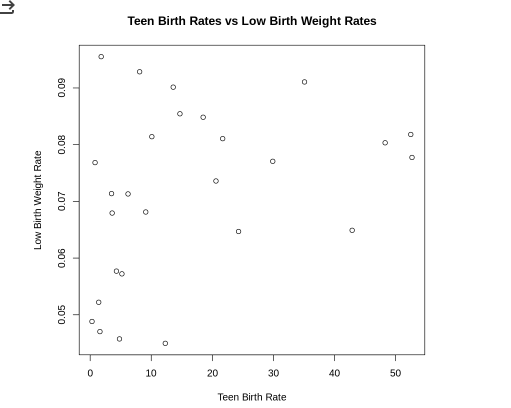


Scatter Plot with trendline:

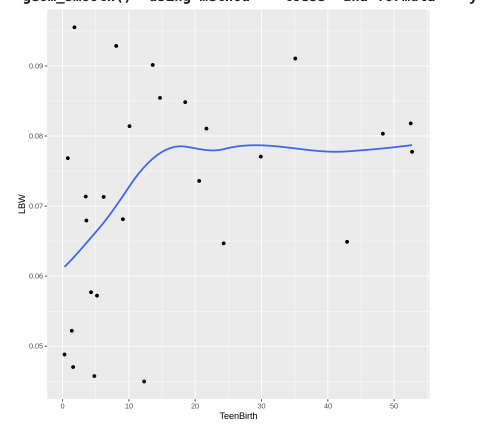